In [25]:
file = open('../misc/out_test_cleaned.txt', 'r')
ids = []
dates = []
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

for line in file.readlines():
    id_ = line[[i for i, letter in enumerate(line) if letter == '/'][-1]+1:].split('.')[0]
    if 'wd' in id_:
        id_ = line[[i for i, letter in enumerate(line) if letter == '/'][-1]+1:].split('.')[1]
    for month in months:
        moindex = line.find(month)
        if moindex != -1:
            date = line[moindex-2:moindex+6]
            if line[moindex+3] == '/':
                date = date.split('/')[0] + date.split('/')[1]
            else:
                date = date.split('/')[0]
            break
    if 'id_' != '':
        ids.append(id_)
        dates.append(date)
file.close()

In [198]:
from datetime import datetime
import pandas as pd
df = pd.read_csv('data_nostitch.csv')
date = []
for row in df.iterrows():
    id_ = row[1]['id']
    try:
        date.append(datetime.strptime(dates[ids.index(id_)], '%y%b%d'))
    except:
        date.append('')
df['date'] = date
df.head()
df = df[df['date'] != '']
df = df[df.date.notnull()]
df.to_csv('date_nostitch_.csv')

In [223]:
startdates = [datetime(1996, 6, 1), datetime(1999, 1, 1),
              datetime(2004, 3, 1), datetime(2009, 8, 1),
              datetime(2012, 2, 1), datetime(2015, 6, 1),
              datetime(2017, 4, 1)]
enddates = [datetime(1997, 11, 1), datetime(2002, 5, 1),
            datetime(2007, 4, 1), datetime(2010, 12, 1),
            datetime(2013, 1, 1), datetime(2016, 5, 1),
            datetime(2019, 1, 1)]

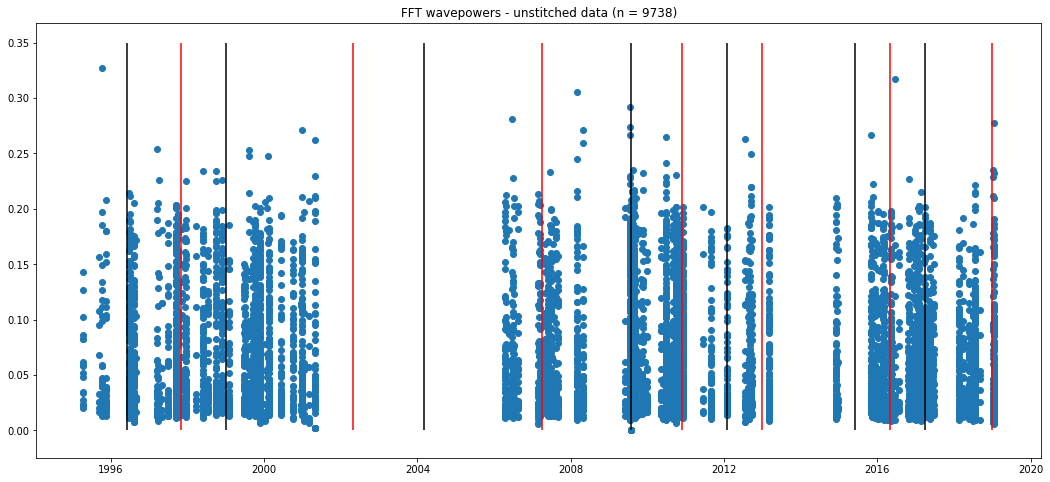

In [229]:
import numpy as np
import matplotlib.pyplot as plt
flattened_dates = []
flattened_fourier_wavenumbers = []
flattened_fourier_wavepowers = []
flattened_ls_wavenumbers = []
flattened_ls_wavepowers = []

top_date = []
top_fourier_wavenumbers = []
top_fourier_wavepowers = []
top_ls_wavenumbers = []
top_ls_wavepowers = []

for row in df.iterrows():
    fft = row[1][' fft'][2:-1].split(' ')
    fftpower = row[1][' fftpower'][2:-1].split(' ')
    ls = row[1][' ls'][2:-1].split(' ')
    lspower = row[1][' lspower'][2:-1].split(' ')
    for i in range(10):
        try:
            flattened_dates.append(row[1]['date'].to_pydatetime())
            flattened_fourier_wavenumbers.append(float(fft[i]))
            flattened_fourier_wavepowers.append(float(fftpower[i]))
            flattened_ls_wavenumbers.append(float(ls[i]))
            flattened_ls_wavepowers.append(float(lspower[i]))
        except:
            pass
    try:
        top_dates.append(row[1]['date'].to_pydatetime())
        top_fourier_wavenumbers.append(float(fft[0]))
        top_fourier_wavepowers.append(float(fftpower[0]))
        top_ls_wavenumbers.append(float(ls[0]))
        top_ls_wavepowers.append(float(lspower[0]))
    except:
        pass

nonzero_indices = wherenonzero(flattened_fourier_wavenumbers)

flattened_dates = np.array(flattened_dates)[nonzero_indices].tolist()
flattened_fourier_wavenumbers = np.array(flattened_fourier_wavenumbers)[nonzero_indices].tolist()
flattened_fourier_wavepowers = np.array(flattened_fourier_wavepowers)[nonzero_indices].tolist()
flattened_ls_wavenumbers = np.array(flattened_ls_wavenumbers)[nonzero_indices].tolist()
flattened_ls_wavepowers = np.array(flattened_ls_wavepowers)[nonzero_indices].tolist()
# top_dates = np.array(flattened_dates)[nonzero_indices].tolist()
# top_fourier_wavenumbers = np.array(flattened_fourier_wavenumbers)[nonzero_indices].tolist()
# top_fourier_wavepowers = np.array(flattened_fourier_wavepowers)[nonzero_indices].tolist()
# top_ls_wavenumbers = np.array(flattened_ls_wavenumbers)[nonzero_indices].tolist()
# top_ls_wavepowers = np.array(flattened_ls_wavepowers)[nonzero_indices].tolist()

plt.figure(figsize=(18,8))
plt.scatter(flattened_dates, flattened_fourier_wavepowers)
plt.vlines(startdates, ymin=0, ymax=0.35)
plt.vlines(enddates, ymin=0, ymax=0.35, color='red')
plt.title('FFT wavepowers - unstitched data (n = 9738)')
plt.show()

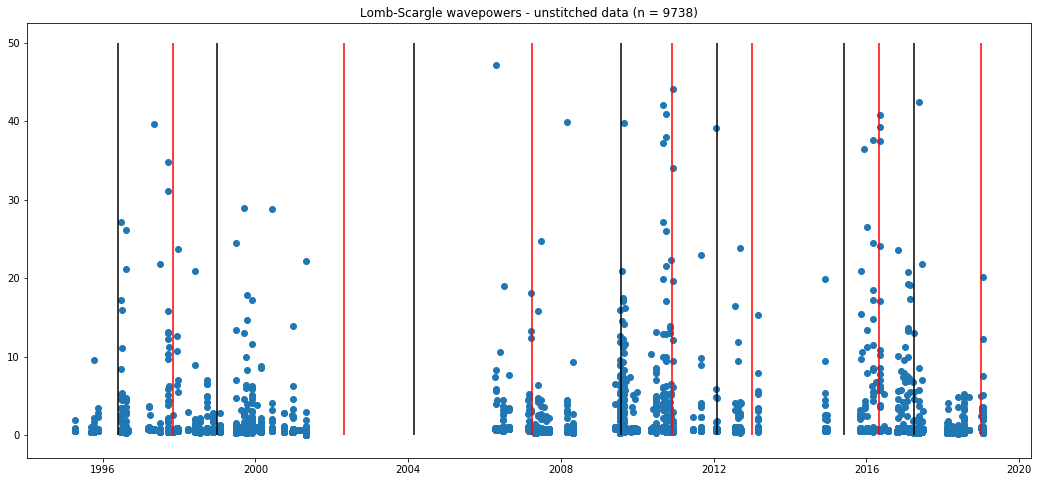

In [231]:
plt.figure(figsize=(18,8))
plt.vlines(startdates, ymin=0, ymax=50)
plt.vlines(enddates, ymin=0, ymax=50, color='red')
plt.scatter(flattened_dates, flattened_ls_wavepowers)
plt.title('Lomb-Scargle wavepowers - unstitched data (n = 9738)')
plt.show()